Loading required Libraries

In [49]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Loading and preprocessing the dataset

In [50]:
# Define directory paths
train_directory = './A/train'
test_directory = './A/test'

# Image augmentation and preprocessing
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_test = ImageDataGenerator(rescale=1./255)

# Create flow_from_directory generators for training and testing data
train_data = datagen_train.flow_from_directory(
    train_directory,
    classes=['.'],
    class_mode='categorical',
    target_size=(256, 256),
    batch_size=32
)

test_data = datagen_test.flow_from_directory(
    test_directory,
    classes=['.'],
    class_mode='categorical',
    target_size=(256, 256),
    batch_size=32
)

Found 1661 images belonging to 1 classes.
Found 245 images belonging to 1 classes.


Weed detection and classification using ANN

Different Hyperparameters(One)

In [58]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Initialize the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer and default learning rate
opt = Adam()
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.1

lr_scheduler = LearningRateScheduler(scheduler)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data,
    callbacks=[lr_scheduler, early_stopping]
)


Epoch 1/10
52/52 [==============================] - 50s 937ms/step - loss: 485377.5938 - accuracy: 0.4184 - val_loss: 1922330.6250 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/10
52/52 [==============================] - 59s 1s/step - loss: 16425573.0000 - accuracy: 0.4232 - val_loss: 30919080.0000 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/10
52/52 [==============================] - 50s 955ms/step - loss: 111409424.0000 - accuracy: 0.3847 - val_loss: 149167552.0000 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/10
52/52 [==============================] - 49s 930ms/step - loss: 389102304.0000 - accuracy: 0.3600 - val_loss: 430685888.0000 - val_accuracy: 1.0000 - lr: 0.0010


In [59]:
loss, accuracy = model.evaluate(test_data)
print("Test Accuracy:", accuracy)

8/8 [==============================] - 2s 177ms/step - loss: 1922330.5000 - accuracy: 1.0000
Test Accuracy: 1.0


(Two)

In [51]:
# Initialize the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer and learning rate scheduler
opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.1

lr_scheduler = LearningRateScheduler(scheduler)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data,
    callbacks=[lr_scheduler, early_stopping]
)

Epoch 1/20
52/52 [==============================] - 51s 962ms/step - loss: 195532816.0000 - accuracy: 0.3299 - val_loss: 373872384.0000 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 2/20
52/52 [==============================] - 49s 945ms/step - loss: 6729352704.0000 - accuracy: 0.1710 - val_loss: 4887429120.0000 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 3/20
52/52 [==============================] - 50s 954ms/step - loss: 46141313024.0000 - accuracy: 0.1565 - val_loss: 22954913792.0000 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 4/20
52/52 [==============================] - 49s 946ms/step - loss: 163337584640.0000 - accuracy: 0.1481 - val_loss: 61402316800.0000 - val_accuracy: 1.0000 - lr: 0.0100


Evaluating the model

In [52]:
loss, accuracy = model.evaluate(test_data)
print("Test Accuracy:", accuracy)

8/8 [==============================] - 2s 176ms/step - loss: 373872352.0000 - accuracy: 1.0000
Test Accuracy: 1.0


Displaying a few sample images from the training directory

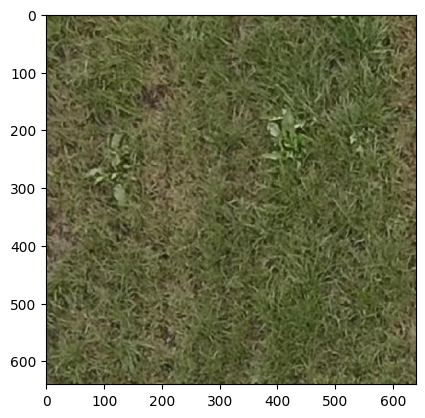

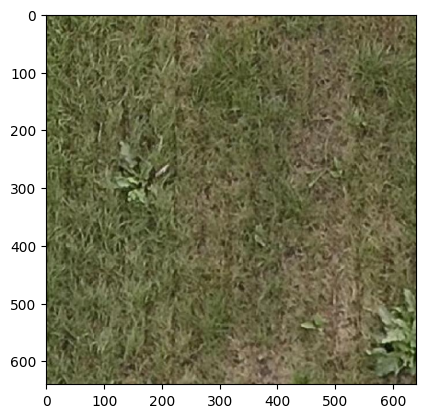

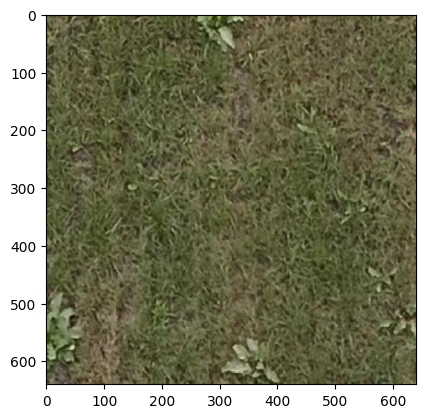

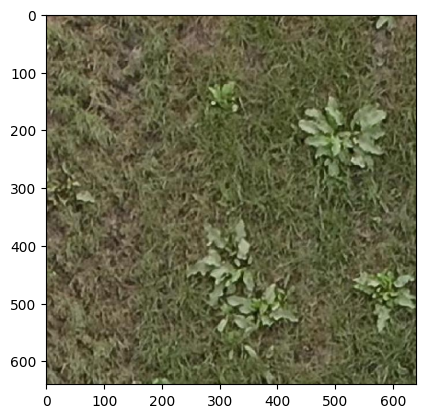

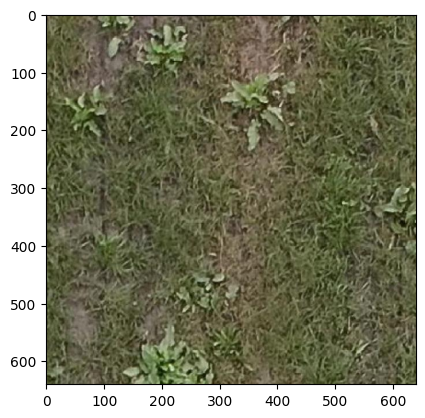

In [53]:
file_list = os.listdir(train_directory)
allowed_extensions = ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

for file_name in file_list[:5]:  # Display the first 5 images
    img_path = os.path.join(train_directory, file_name)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()

Built everything from sratch myself

Epoch 1/10, Loss: 2.119651355254509
Number of epochs: 10
Train Accuracy: 1.0
Test Accuracy: 1.0


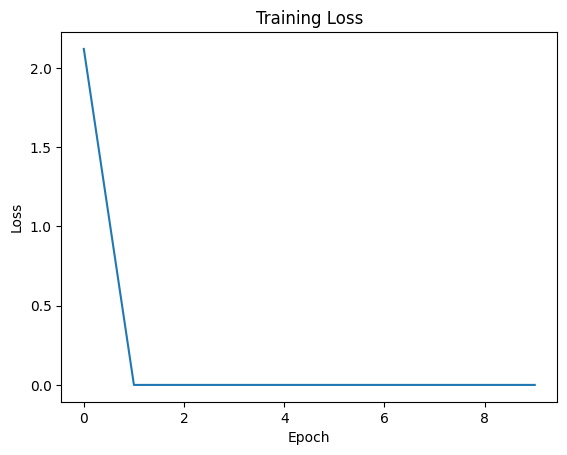

In [54]:
import numpy as np
import json
from PIL import Image
import os
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing
def load_data(data_dir, annotation_file, allowed_extensions):
    images = []
    labels = []
    with open(annotation_file, "r") as f:
        data = json.load(f)
        for image_info in data["images"]:
            file_name = image_info["file_name"]
            if file_name.lower().endswith(allowed_extensions):
                image_path = os.path.join(data_dir, file_name)
                images.append(np.array(Image.open(image_path).resize((224, 224))))  # Resize images to a fixed size
                # Check if the image has weeds (assuming binary classification)
                label = 0
                for category_id in image_info.get("categories", []):
                    if category_id == 1:  # Assuming category_id 1 corresponds to weeds
                        label = 1
                        break
                labels.append(label)
    return np.array(images), np.array(labels)

allowed_extensions = ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

train_images, train_labels = load_data("./A/train", "./A/train/_annotations.coco.json", allowed_extensions)
test_images, test_labels = load_data("./A/test", "./A/test/_annotations.coco.json", allowed_extensions)

# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Step 2: Model Architecture (ANN from scratch)
class NeuralNetwork:
    def __init__(self):
        self.weights = np.random.randn(224*224*3, 1) * 0.01  # Initialize weights closer to zero
        self.bias = 0

    def relu(self, x):
        return np.maximum(0, x)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def train(self, X, y, epochs, learning_rate):
        loss_history = []
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.predict(X)
            
            # Compute loss
            loss = -np.mean(y * np.log(y_pred.clip(min=1e-10)) + (1 - y) * np.log((1 - y_pred).clip(min=1e-10)))
            loss_history.append(loss)
            
            # Backpropagation
            dw = np.dot(X.T, (y_pred - y)) / len(X)
            db = np.mean(y_pred - y)
            
            # Update weights and bias
            self.weights -= learning_rate * dw.reshape(self.weights.shape)
            self.bias -= learning_rate * db
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss}")

        return loss_history

# Reshape images for ANN input
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Create and train the model
model = NeuralNetwork()
loss_history = model.train(train_images_flat, train_labels.reshape(-1, 1), epochs=10, learning_rate=0.01)

# Ensure the loop runs for all epochs
print("Number of epochs:", len(loss_history))

# Step 4: Evaluation
train_predictions = model.predict(train_images_flat)
test_predictions = model.predict(test_images_flat)

train_accuracy = np.mean((train_predictions >= 0.5) == train_labels)
test_accuracy = np.mean((test_predictions >= 0.5) == test_labels)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Step 5: Results Analysis
# Plot loss history
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


Visualizing for better understanding

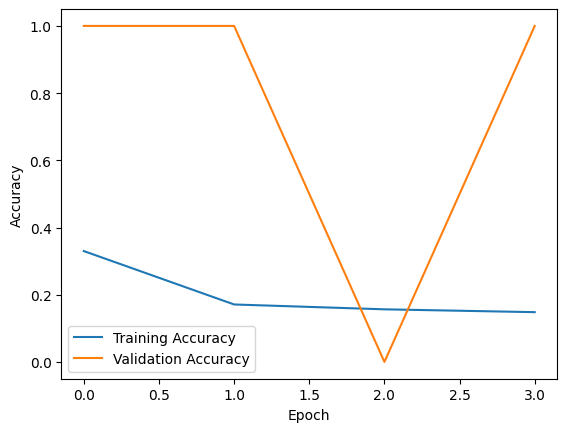

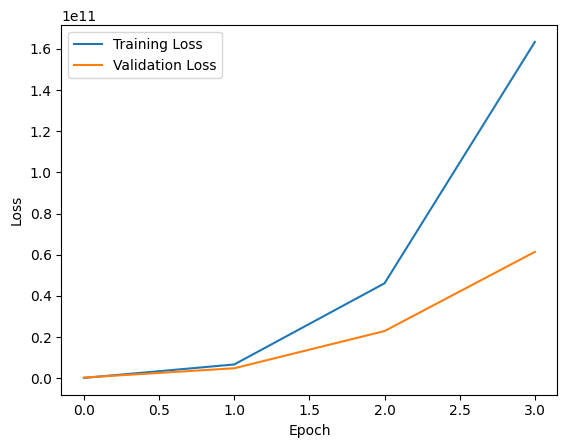

In [55]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()